In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

In [3]:
data_file = "syndrome-grippal.csv"

import os
import urllib.request
if not os.path.exists(data_file):
    urllib.request.urlretrieve(data_url, data_file)

In [4]:
raw_data = pd.read_csv(data_file, skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202339          3   82112   70891.0   93333.0    124       107.0   
1     202338          3   63567   55525.0   71609.0     96        84.0   
2     202337          3   49085   42079.0   56091.0     74        63.0   
3     202336          3   38247   32237.0   44257.0     58        49.0   
4     202335          3   31695   26013.0   37377.0     48        39.0   
5     202334          3   26663   21057.0   32269.0     40        32.0   
6     202333          3   19144   13161.0   25127.0     29        20.0   
7     202332          3   14641   10285.0   18997.0     22        15.0   
8     202331          3   15286   10705.0   19867.0     23        16.0   
9     202330          3   13205    8647.0   17763.0     20        13.0   
10    202329          3   11122    7113.0   15131.0     17        11.0   
11    202328          3    9179    5703.0   12655.0     14         9.0   
12    202327          3    8999    5763.0   12235.0     14         9.0   
13    202326          3    9023    5934.0   12112.0     14         9.0   
14    202325          3   10090    6739.0   13441.0     15        10.0   
15    202324          3   11308    7639.0   14977.0     17        11.0   
16    202323          3   14300   10661.0   17939.0     22        17.0   
17    202322          3   18303   13822.0   22784.0     28        21.0   
18    202321          3   16460   12188.0   20732.0     25        19.0   
19    202320          3   16162   11963.0   20361.0     24        18.0   
20    202319          3   16901   12577.0   21225.0     25        18.0   
21    202318          3   19929   15402.0   24456.0     30        23.0   
22    202317          3   27007   21779.0   32235.0     41        33.0   
23    202316          3   27875   22767.0   32983.0     42        34.0   
24    202315          3   37455   30993.0   43917.0     56        46.0   
25    202314          3   48060   40671.0   55449.0     72        61.0   
26    202313          3   64859   56800.0   72918.0     98        86.0   
27    202312          3   72750   64499.0   81001.0    109        97.0   
28    202311          3   74638   66420.0   82856.0    112       100.0   
29    202310          3   76368   68243.0   84493.0    115       103.0   
...      ...        ...     ...       ...       ...    ...         ...   
2001  198521          3   26096   19621.0   32571.0     47        35.0   
2002  198520          3   27896   20885.0   34907.0     51        38.0   
2003  198519          3   43154   32821.0   53487.0     78        59.0   
2004  198518          3   40555   29935.0   51175.0     74        55.0   
2005  198517          3   34053   24366.0   43740.0     62        44.0   
2006  198516          3   50362   36451.0   64273.0     91        66.0   
2007  198515          3   63881   45538.0   82224.0    116        83.0   
2008  198514          3  134545  114400.0  154690.0    244       207.0   
2009  198513          3  197206  176080.0  218332.0    357       319.0   
2010  198512          3  245240  223304.0  267176.0    445       405.0   
2011  198511          3  276205  252399.0  300011.0    501       458.0   
2012  198510          3  353231  326279.0  380183.0    640       591.0   
2013  198509          3  369895  341109.0  398681.0    670       618.0   
2014  198508          3  389886  359529.0  420243.0    707       652.0   
2015  198507          3  471852  432599.0  511105.0    855       784.0   
2016  198506          3  565825  518011.0  613639.0   1026       939.0   
2017  198505          3  637302  592795.0  681809.0   1155      1074.0   
2018  198504          3  424937  390794.0  459080.0    770       708.0   
2019  198503          3  213901  174689.0  253113.0    388       317.0   
2020  198502          3   97586   80949.0  114223.0    177       147.0   
2021  198501          3   85489   65918.0  105060.0    155       120.0   
2022  198452          3   84830   60602.0  109058.0    154       110.0   
2023  198451

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1794  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1794        FR   France

In [6]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202339          3   82112   70891.0   93333.0    124       107.0   
1     202338          3   63567   55525.0   71609.0     96        84.0   
2     202337          3   49085   42079.0   56091.0     74        63.0   
3     202336          3   38247   32237.0   44257.0     58        49.0   
4     202335          3   31695   26013.0   37377.0     48        39.0   
5     202334          3   26663   21057.0   32269.0     40        32.0   
6     202333          3   19144   13161.0   25127.0     29        20.0   
7     202332          3   14641   10285.0   18997.0     22        15.0   
8     202331          3   15286   10705.0   19867.0     23        16.0   
9     202330          3   13205    8647.0   17763.0     20        13.0   
10    202329          3   11122    7113.0   15131.0     17        11.0   
11    202328          3    9179    5703.0   12655.0     14         9.0   
12    202327          3    8999    5763.0   12235.0     14         9.0   
13    202326          3    9023    5934.0   12112.0     14         9.0   
14    202325          3   10090    6739.0   13441.0     15        10.0   
15    202324          3   11308    7639.0   14977.0     17        11.0   
16    202323          3   14300   10661.0   17939.0     22        17.0   
17    202322          3   18303   13822.0   22784.0     28        21.0   
18    202321          3   16460   12188.0   20732.0     25        19.0   
19    202320          3   16162   11963.0   20361.0     24        18.0   
20    202319          3   16901   12577.0   21225.0     25        18.0   
21    202318          3   19929   15402.0   24456.0     30        23.0   
22    202317          3   27007   21779.0   32235.0     41        33.0   
23    202316          3   27875   22767.0   32983.0     42        34.0   
24    202315          3   37455   30993.0   43917.0     56        46.0   
25    202314          3   48060   40671.0   55449.0     72        61.0   
26    202313          3   64859   56800.0   72918.0     98        86.0   
27    202312          3   72750   64499.0   81001.0    109        97.0   
28    202311          3   74638   66420.0   82856.0    112       100.0   
29    202310          3   76368   68243.0   84493.0    115       103.0   
...      ...        ...     ...       ...       ...    ...         ...   
2001  198521          3   26096   19621.0   32571.0     47        35.0   
2002  198520          3   27896   20885.0   34907.0     51        38.0   
2003  198519          3   43154   32821.0   53487.0     78        59.0   
2004  198518          3   40555   29935.0   51175.0     74        55.0   
2005  198517          3   34053   24366.0   43740.0     62        44.0   
2006  198516          3   50362   36451.0   64273.0     91        66.0   
2007  198515          3   63881   45538.0   82224.0    116        83.0   
2008  198514          3  134545  114400.0  154690.0    244       207.0   
2009  198513          3  197206  176080.0  218332.0    357       319.0   
2010  198512          3  245240  223304.0  267176.0    445       405.0   
2011  198511          3  276205  252399.0  300011.0    501       458.0   
2012  198510          3  353231  326279.0  380183.0    640       591.0   
2013  198509          3  369895  341109.0  398681.0    670       618.0   
2014  198508          3  389886  359529.0  420243.0    707       652.0   
2015  198507          3  471852  432599.0  511105.0    855       784.0   
2016  198506          3  565825  518011.0  613639.0   1026       939.0   
2017  198505          3  637302  592795.0  681809.0   1155      1074.0   
2018  198504          3  424937  390794.0  459080.0    770       708.0   
2019  198503          3  213901  174689.0  253113.0    388       317.0   
2020  198502          3   97586   80949.0  114223.0    177       147.0   
2021  198501          3   85489   65918.0  105060.0    155       120.0   
2022  198452          3   84830   60602.0  109058.0    154       110.0   
2023  198451

In [7]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [11]:
sorted_data = data.set_index('period').sort_index()
sorted_data 

week  indicator     inc   inc_low    inc_up inc100  \
period                                                                        
1984-10-29/1984-11-04  198444          3   68422   20056.0  116788.0    125   
1984-11-05/1984-11-11  198445          3  135223  101414.0  169032.0    246   
1984-11-12/1984-11-18  198446          3   87330   67686.0  106974.0    159   
1984-11-19/1984-11-25  198447          3   72029   54274.0   89784.0    131   
1984-11-26/1984-12-02  198448          3   78620   60634.0   96606.0    143   
1984-12-03/1984-12-09  198449          3  101073   81684.0  120462.0    184   
1984-12-10/1984-12-16  198450          3  123680  101401.0  145959.0    225   
1984-12-17/1984-12-23  198451          3  101726   80242.0  123210.0    185   
1984-12-24/1984-12-30  198452          3   84830   60602.0  109058.0    154   
1984-12-31/1985-01-06  198501          3   85489   65918.0  105060.0    155   
1985-01-07/1985-01-13  198502          3   97586   80949.0  114223.0    177   
1985-01-14/1985-01-20  198503          3  213901  174689.0  253113.0    388   
1985-01-21/1985-01-27  198504          3  424937  390794.0  459080.0    770   
1985-01-28/1985-02-03  198505          3  637302  592795.0  681809.0   1155   
1985-02-04/1985-02-10  198506          3  565825  518011.0  613639.0   1026   
1985-02-11/1985-02-17  198507          3  471852  432599.0  511105.0    855   
1985-02-18/1985-02-24  198508          3  389886  359529.0  420243.0    707   
1985-02-25/1985-03-03  198509          3  369895  341109.0  398681.0    670   
1985-03-04/1985-03-10  198510          3  353231  326279.0  380183.0    640   
1985-03-11/1985-03-17  198511          3  276205  252399.0  300011.0    501   
1985-03-18/1985-03-24  198512          3  245240  223304.0  267176.0    445   
1985-03-25/1985-03-31  198513          3  197206  176080.0  218332.0    357   
1985-04-01/1985-04-07  198514          3  134545  114400.0  154690.0    244   
1985-04-08/1985-04-14  198515          3   63881   45538.0   82224.0    116   
1985-04-15/1985-04-21  198516          3   50362   36451.0   64273.0     91   
1985-04-22/1985-04-28  198517          3   34053   24366.0   43740.0     62   
1985-04-29/1985-05-05  198518          3   40555   29935.0   51175.0     74   
1985-05-06/1985-05-12  198519          3   43154   32821.0   53487.0     78   
1985-05-13/1985-05-19  198520          3   27896   20885.0   34907.0     51   
1985-05-20/1985-05-26  198521          3   26096   19621.0   32571.0     47   
...                       ...        ...     ...       ...       ...    ...   
2023-03-06/2023-03-12  202310          3   76368   68243.0   84493.0    115   
2023-03-13/2023-03-19  202311          3   74638   66420.0   82856.0    112   
2023-03-20/2023-03-26  202312          3   72750   64499.0   81001.0    109   
2023-03-27/2023-04-02  202313          3   64859   56800.0   72918.0     98   
2023-04-03/2023-04-09  202314          3   48060   40671.0   55449.0     72   
2023-04-10/2023-04-16  202315          3   37455   30993.0   43917.0     56   
2023-04-17/2023-04-23  202316          3   27875   22767.0   32983.0     42   
2023-04-24/2023-04-30  202317          3   27007   21779.0   32235.0     41   
2023-05-01/2023-05-07  202318          3   19929   15402.0   24456.0     30   
2023-05-08/2023-05-14  202319          3   16901   12577.0   21225.0     25   
2023-05-15/2023-05-21  202320          3   16162   11963.0   20361.0     24   
2023-05-22/2023-05-28  202321          3   16460   12188.0   20732.0     25   
2023-05-29/2023-06-04  202322          3   18303   13822.0   22784.0     28   
2023-06-05/2023-06-11  202323          3   14300   10661.0   17939.0     22   
2023-06-12/2023-06-18  202324          3   11308    7639.0   14977.0     17   
2023-06-19/2023-06-25  202325          3   10090    6739.0   13441.0     15   
2023-06-26/2023-07-02  202326          3    9023    5934.0   12112.0     14   
2023-07-03/2023-07-09  202327          3    8999    5763.0   12235.0     14

In [9]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


In [10]:
sorted_data['inc'].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

In [12]:
sorted_data['inc'][0]

'68422'

tout la colonne "inc" est representer par des chaines de caractère a cause d'un trait dans une ligne de la semaine 19 de l'année 1989 trouver dans par la cellule "5" 
apres "sorted_data['inc'][0]" j'ai plus ce probléme de l'année 1989 
du coup maintenant je vais convertire mes chaines de caractère en entier .

In [16]:
sorted_data['inc'] = sorted_data['inc'].astype(int)

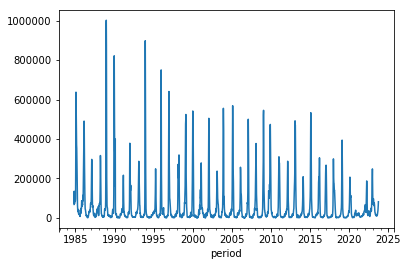

In [17]:
sorted_data['inc'].plot()

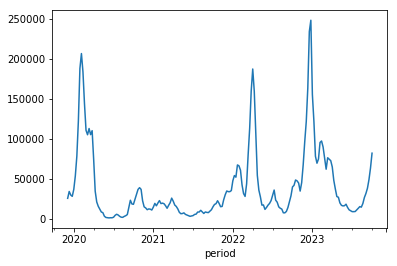

In [18]:
sorted_data['inc'][-200:].plot()

In [19]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

In [20]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

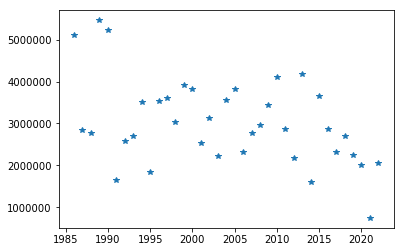

In [21]:
yearly_incidence.plot(style='*')

In [22]:
yearly_incidence.sort_values()

2021     743449
2014    1600941
1991    1659249
1995    1840410
2020    2010315
2022    2060304
2012    2175217
2003    2234584
2019    2254386
2006    2307352
2017    2321583
2001    2529279
1992    2574578
1993    2703886
2018    2705325
1988    2765617
2007    2780164
1987    2855570
2016    2856393
2011    2857040
2008    2973918
1998    3034904
2002    3125418
2009    3444020
1994    3514763
1996    3539413
2004    3567744
1997    3620066
2015    3654892
2000    3826372
2005    3835025
1999    3908112
2010    4111392
2013    4182691
1986    5115251
1990    5235827
1989    5466192
dtype: int64

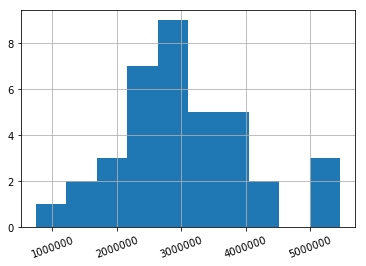

In [23]:
yearly_incidence.hist(xrot=20)